In [3]:
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#%matplotlib inline
from matplotlib.font_manager import FontProperties

params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)

font=FontProperties()
fontc=font.copy()
fontc.set_family('cursive')


import os
from matplotlib import font_manager as fm, rcParams


apath_r=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/AmaticSC-Regular.ttf')
apath_b=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/Amatic-Bold.ttf')
aprop_r=fm.FontProperties(fname=apath_r)
aprop_b=fm.FontProperties(fname=apath_b)

jpath_r=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/JosefinSlab-Regular.ttf')
jpath_sb=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/JosefinSlab-SemiBold.ttf')
jpath_b=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/JosefinSlab-Bold.ttf')
jprop_r=fm.FontProperties(fname=jpath_r)
jprop_sb=fm.FontProperties(fname=jpath_sb)
jprop_b=fm.FontProperties(fname=jpath_b)

opath_r=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/Oswald-Regular.ttf')
opath_sb=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/Oswald-DemiBold.ttf')
opath_b=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/Oswald-Bold.ttf')
oprop_r=fm.FontProperties(fname=opath_r)
oprop_sb=fm.FontProperties(fname=opath_sb)
oprop_b=fm.FontProperties(fname=opath_b)

# Earth T-P profile #

(30,) (96,)
(30, 192, 96, 6)


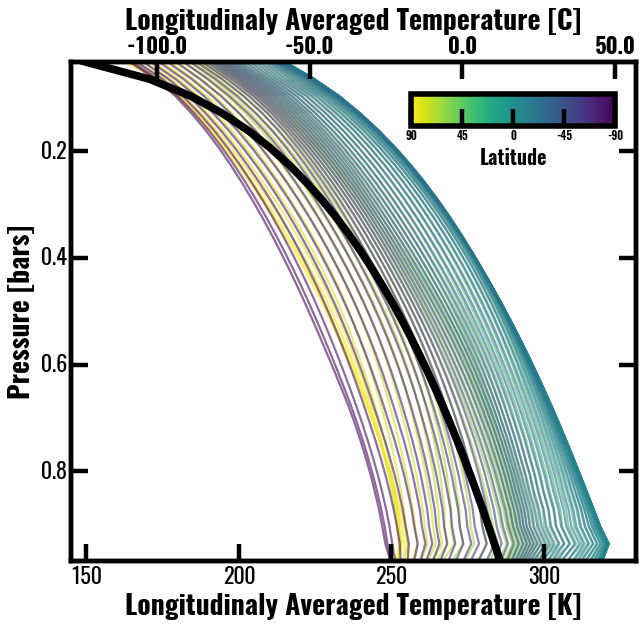

In [19]:
path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
runname='EARTH_T63'

p_BAR=pickle.load(open(path+runname+'/pres_lon_lat.txt', 'rb'))[0]
lat_arr=pickle.load(open(path+runname+'/pres_lon_lat.txt', 'rb'))[2]
data_26=pickle.load(open(path+runname+'/fort26.txt', 'rb'))
print p_BAR.shape, lat_arr.shape

def earth_temp(press):
    return 288.08*((press/101.29)**(1./5.256))


param_earth=earth_temp(p_BAR*100.)

print data_26.shape
temps=data_26[:,:,:,5]

long_avg_temps=np.mean(temps,axis=1)

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.90,left=0.15,right=0.98)

plt.style.use('classic')

fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7




norm=matplotlib.colors.Normalize(vmin=-90,vmax=90)
scal_m=matplotlib.cm.ScalarMappable(cmap=plt.cm.viridis,norm=norm)
#scal_m=matplotlib.cm.ScalarMappable(cmap=plt.cm.twilight_shifted,norm=norm)
scal_m.set_array([])

for j in range(0,len(lat_arr)):
    plt.plot(long_avg_temps[:,j],p_BAR,color=scal_m.to_rgba(lat_arr[j]),linewidth=2.0,alpha=0.6)
plt.plot(param_earth,p_BAR,color='black',linewidth=7.0)
    
plt.ylabel('Pressure [bars]',
           fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r)
plt.ylim(np.nanmax(p_BAR),np.nanmin(p_BAR))

plt.xlabel('Longitudinaly Averaged Temperature [K]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(145,330)

#plt.figtext(0.155,0.9,'Parameterized Earth', fontsize=20,color='black',rotation=-25,fontweight='bold')

#ax=fig.add_subplot(111)
ax2=axes.twiny()
ax2.set_xlabel('Longitudinaly Averaged Temperature [C]',
           fontsize=25,fontproperties=oprop_b)
ax2.set_xlim(145-273.15,330-273.15)
#ax2.tick_params(labelsize=20)
ax2.set_xticklabels(ax2.get_xticks(),fontproperties=oprop_b,fontsize=20)
#prop={'fname':opath_r,'size':20}


cbaxes = fig.add_axes([0.65, 0.80, 0.3, 0.05]) 
cb = plt.colorbar(scal_m, cax = cbaxes,ticks=[-90,-45,0,45,90],orientation='horizontal')
cb.ax.tick_params(labelsize=14)
cb.ax.set_xticklabels([-90,-45,0,45,90],fontproperties=oprop_b)
cb.ax.invert_xaxis() 
cb.outline.set_linewidth(5)
cb.set_label('Latitude', fontsize=18,fontproperties=oprop_b)

plt.savefig(path+runname+'/'+runname+'_T-P.pdf')

In [44]:
################################

path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'

runpath4='FiducialPlanet_NEW/Model4/'#L10/T42/'
runs4_n=np.array(['P0_001','P0_005','P0_010','P0_015','P0_020'])
runs4_l=['0.01 bars','0.05 bars','0.10 bars', '0.15 bars','0.20 bars']
surfp_4=np.array([0.01,0.05,0.10,0.15,0.20])


lev_arr4=(pickle.load(open(path+runpath4+runs4_n[0]+'/pres_lon_lat.txt', 'rb')))[0]
lon_arr=(pickle.load(open(path+runpath4+runs4_n[0]+'/pres_lon_lat.txt', 'rb')))[1]
lat_arr=(pickle.load(open(path+runpath4+runs4_n[0]+'/pres_lon_lat.txt', 'rb')))[2]

tmp_lo_4=np.empty([len(lat_arr),len(runs4_n)])
uwd_lo_4=np.empty([len(lat_arr),len(runs4_n)])
vwd_lo_4=np.empty([len(lat_arr),len(runs4_n)])

tmp_lo_f_4=np.empty([len(lon_arr),len(lat_arr),len(runs4_n)])
uwd_lo_f_4=np.empty([len(lon_arr),len(lat_arr),len(runs4_n)])
vwd_lo_f_4=np.empty([len(lon_arr),len(lat_arr),len(runs4_n)])
for ri,r in enumerate(runs4_n):
    tp=path+runpath4+str(r)
#    tmp_lo_4[:,ri]=pickle.load(open(tp+'/TMP_avrg.txt', 'rb'))
    tp=path+runpath4+str(r)
    p_BAR=(pickle.load(open(tp+'/pres_lon_lat.txt', 'rb')))[0]
    p_lev=0.218*10.
    levl=np.argmin(np.abs(p_BAR-p_lev))
    print levl, p_BAR[levl]
    tmp_lo_4[:,ri]=pickle.load(open(tp+'/TMP_avrg.txt', 'rb'))[levl,:]
    tmp_lo_f_4[:,:,ri]=np.nanmean(pickle.load(open(tp+'/TMP_lo.txt', 'rb'))[:,levl,:,:],axis=0)
    uwd_lo_f_4[:,:,ri]=np.nanmean(pickle.load(open(tp+'/UWD_lo.txt', 'rb'))[:,levl,:,:],axis=0)
    vwd_lo_f_4[:,:,ri]=np.nanmean(pickle.load(open(tp+'/VWD_lo.txt', 'rb'))[:,levl,:,:],axis=0)


print tmp_lo_4.shape
########################################

runpath3a='FiducialPlanet_NEW/Model3/'#L30/'
runs3_na=np.array(['P0_025','P0_050','P0_075','P0_100','P0_150','P0_170','P0_190','P0_195','P0_200','P0_205','P0_210','P0_230','P0_250','P0_300'])
runs3_la=['0.25 bars','0.50 bars','0.75 bars', '1.00 bars','1.50 bars','1.70 bars','1.90 bars','1.95 bars','2.00 bars','2.05 bars','2.10 bars', '2.30 bars','2.50 bars','3.00 bars']
surfp_3a=np.array([0.25,0.50,0.75,1.00,1.50,1.70,1.90,1.95,2.0,2.05,2.10,2.30,2.50,3.00])

lev_arr3a=(pickle.load(open(path+runpath3a+runs3_na[0]+'/pres_lon_lat.txt', 'rb')))[0]


tmp_lo_3a=np.empty([len(lat_arr),len(runs3_na)])

tmp_lo_f_3a=np.empty([len(lon_arr),len(lat_arr),len(runs3_na)])
uwd_lo_f_3a=np.empty([len(lon_arr),len(lat_arr),len(runs3_na)])
vwd_lo_f_3a=np.empty([len(lon_arr),len(lat_arr),len(runs3_na)])


for ri,r in enumerate(runs3_na):
    tp=path+runpath3a+str(r)
    tmp_lo_3a[:,ri]=pickle.load(open(tp+'/TMP_avrg.txt', 'rb'))[levl,:]
    p_BAR=(pickle.load(open(tp+'/pres_lon_lat.txt', 'rb')))[0]
    p_lev=0.218*20.
    levl=np.argmin(np.abs(p_BAR-p_lev))
    print levl, p_BAR[levl]
    
    tmp_lo_f_3a[:,:,ri]=np.nanmean(pickle.load(open(tp+'/TMP_lo.txt', 'rb'))[:,levl,:,:],axis=0)
    uwd_lo_f_3a[:,:,ri]=np.nanmean(pickle.load(open(tp+'/UWD_lo.txt', 'rb'))[:,levl,:,:],axis=0)
    vwd_lo_f_3a[:,:,ri]=np.nanmean(pickle.load(open(tp+'/VWD_lo.txt', 'rb'))[:,levl,:,:],axis=0)




runpath2='FiducialPlanet_NEW/Model2/'
runs2_n=np.array(['P0_4','P0_5','P0_6','P0_7','P0_8','P0_9'])#,'P0_95'])
runs2_l=['4.00 bars','5.00 bars','6.00 bars', '7.00 bars','8.00 bars','9.00 bars']#,'9.50 bars']
surfp_2=np.array([4.,5.,6.,7.,8.,9.,9.5])#,9.5])

tmp_lo_2=np.empty([len(lat_arr),len(runs2_n)])*np.nan
for ri,r in enumerate(runs2_n):
    if ri==4: 
        continue
    tp=path+runpath2+str(r)
    #p_BAR=(pickle.load(open(tp+'/pres_lon_lat.txt', 'rb')))[0]
    tmp_lo_2[:,ri]=pickle.load(open(tp+'/TMP_avrg.txt', 'rb'))[levl,:]


9 0.00909090909090909
9 0.045454545454545456
9 0.09090909090909091
9 0.13636363636363635
9 0.18181818181818182
(64, 5)
9 0.22727272727272727
9 0.45454545454545453
14 0.703125
19 0.9523809523809523
29 1.4516129032258065
34 1.6527777777777777
39 1.8536585365853657
39 1.9024390243902438
39 1.951219512195122
39 1.9999999999999998
39 2.048780487804878
39 2.24390243902439
39 2.4390243902439024
39 2.926829268292683


ValueError: could not broadcast input array from shape (40,64) into shape (64)

(array([-4000000., -3000000., -2000000., -1000000.,        0.,  1000000.,
         2000000.,  3000000.,  4000000.]),
 <a list of 9 Text yticklabel objects>)

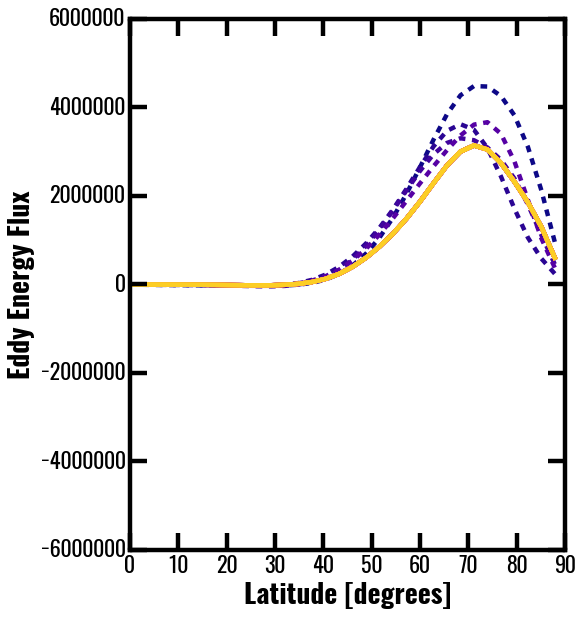

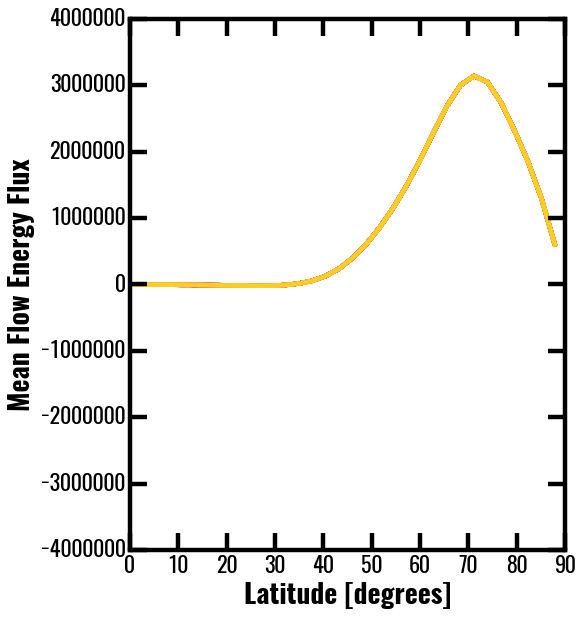

In [8]:
runpath4='FiducialPlanet_NEW/Model4/'
runs4_n=np.array(['P0_001','P0_005','P0_010','P0_015','P0_020'])
runs4_l=['0.01 bars','0.05 bars','0.10 bars', '0.15 bars','0.20 bars']


runpath3='FiducialPlanet_NEW/Model3/'#L30/'
runs3_n=np.array(['P0_025','P0_050','P0_075','P0_100','P0_150','P0_170','P0_190','P0_195','P0_200','P0_205','P0_210','P0_230','P0_250','P0_300'])
runs3_l=['0.25 bars','0.50 bars','0.75 bars', '1.00 bars','1.50 bars','1.70 bars','1.90 bars','1.95 bars','2.00 bars','2.05 bars','2.10 bars', '2.30 bars','2.50 bars','3.00 bars']

color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_n)+2))


fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.76)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

for ri,r in enumerate(runs4_n):
    tp=path+runpath4+str(r)
    latar=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[2]
    data_ed=pickle.load(open(tp+'/HT_eddies_a.txt', 'rb'))
    data_ed_vsum=np.nansum(data_ed,axis=0)
    plt.plot(latar,data_ed_vsum,linewidth=4.0,color=color_list[ri],linestyle='--')
    
for ri,r in enumerate(runs3_n):
    tp=path+runpath3+str(r)
    data_ed_vsum=pickle.load(open(tp+'/HT_eddies_a.txt', 'rb'))
    data_ed_vsum=np.nansum(data_ed,axis=0)
    plt.plot(latar,data_ed_vsum,linewidth=4.0,color=color_list[ri+len(runs4_n)],linestyle='-')

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Eddy Energy Flux',fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
#plt.ylim(-1000,1000000)


fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.76)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

for ri,r in enumerate(runs4_n):
    tp=path+runpath4+str(r)
    latar=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[2]
    data_mf=pickle.load(open(tp+'/HT_meanfl.txt', 'rb'))
    data_mf_vsum=np.nansum(data_ed,axis=0)
    plt.plot(latar,data_mf_vsum,linewidth=4.0,color=color_list[ri],linestyle='--')
    
for ri,r in enumerate(runs3_n):
    tp=path+runpath3+str(r)
    data_mf_vsum=pickle.load(open(tp+'/HT_meanfl.txt', 'rb'))
    data_mf_vsum=np.nansum(data_ed,axis=0)
    plt.plot(latar,data_mf_vsum,linewidth=4.0,color=color_list[ri+len(runs4_n)],linestyle='-')

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Mean Flow Energy Flux',fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
#plt.ylim(-1000,1000000)

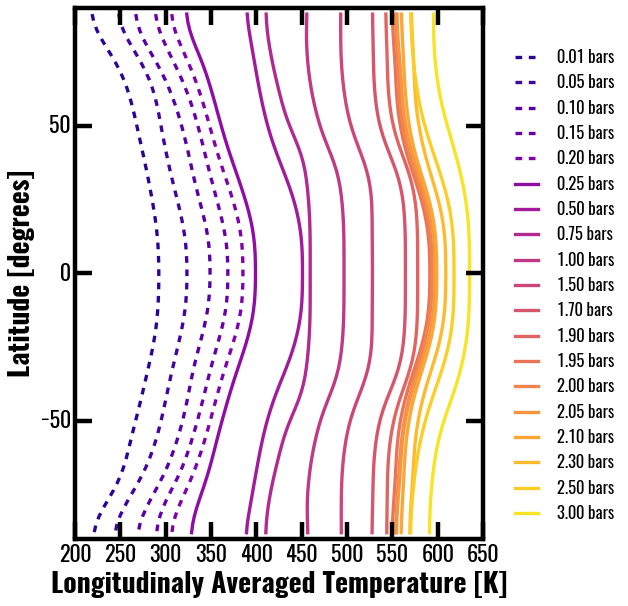

In [9]:
fig,axes=plt.subplots(figsize=(8.5,8))
#plt.gcf().subplots_adjust(bottom=0.18,top=0.95,left=0.15,right=0.70)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.75)

plt.style.use('classic')

fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+2))
for ri,r in enumerate(runs4_n):
    plt.plot(tmp_lo_4[:,ri],lat_arr,linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    plt.plot(tmp_lo_3a[:,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

#for ri,r in enumerate(runs2_n):
#    plt.plot(tmp_lo_2[:,ri],lat_arr,linewidth=3.0,linestyle=':',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])

    
    
plt.ylabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r)

plt.ylim(-90,90)

plt.xlabel('Longitudinaly Averaged Temperature [K]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)

#plt.legend(loc='center left',frameon=False,fontsize=15)
#ft=fm.FontProperties(fname='/Users/ermay/Library/Fonts/Oswald-Regular.ttf').get_name()
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})


plt.savefig(path+runpath4+'/TEMP_avg_comp.pdf')
plt.savefig(path+runpath3a+'/TEMP_avg_comp.pdf')
plt.savefig(path+runpath2+'/TEMP_avg_comp.pdf')



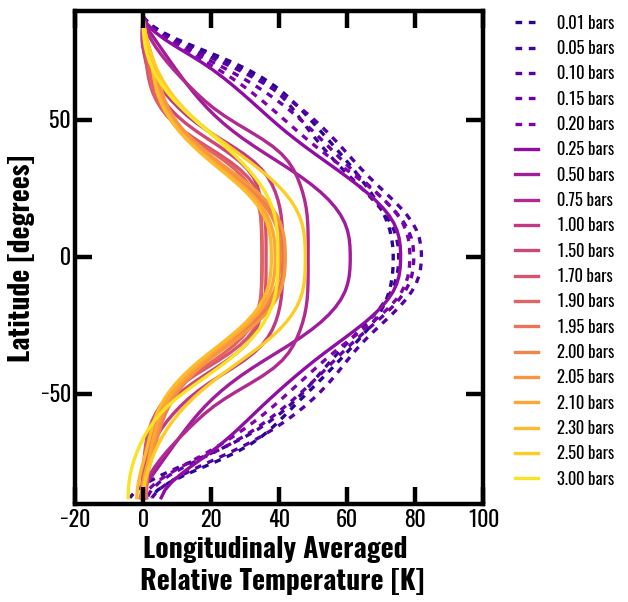

In [10]:
fig,axes=plt.subplots(figsize=(8.5,8))
#plt.gcf().subplots_adjust(bottom=0.18,top=0.95,left=0.15,right=0.70)
plt.gcf().subplots_adjust(bottom=0.18,top=0.95,left=0.15,right=0.75)

plt.style.use('classic')

fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+2))
for ri,r in enumerate(runs4_n):
    plt.plot(tmp_lo_4[:,ri]-tmp_lo_4[0,ri],lat_arr,
             linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    plt.plot(tmp_lo_3a[:,ri]-tmp_lo_3a[0,ri],lat_arr,
             linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

    
#for ri,r in enumerate(runs2_n):
#    plt.plot(tmp_lo_2[:,ri]-tmp_lo_2[0,ri],lat_arr,
#             linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])
       
    
plt.ylabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r)

plt.ylim(-90,90)

plt.xlabel('Longitudinaly Averaged \n Relative Temperature [K]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)

#plt.legend(loc='center left',frameon=False,fontsize=15)
#ft=fm.FontProperties(fname='/Users/ermay/Library/Fonts/Oswald-Regular.ttf').get_name()
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})


plt.savefig(path+runpath4+'/TEMP_avg_comp_r.pdf')
plt.savefig(path+runpath3a+'/TEMP_avg_comp_r.pdf')
#plt.savefig(path+runpath2+'/TEMP_avg_comp_r.pdf')


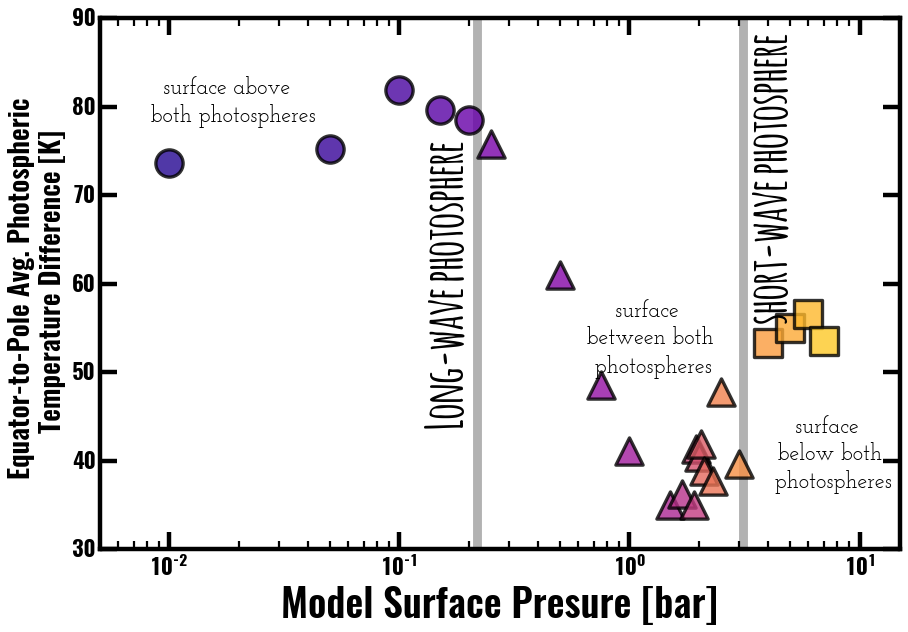

In [11]:
fig,axes=plt.subplots(figsize=(12.5,8))
#plt.gcf().subplots_adjust(bottom=0.18,top=0.95,left=0.15,right=0.70)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.95)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2


color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs2_n)+2))
ms=600
ap=0.8

lwp=0.218
swp=3.114

plt.axvline(x=lwp, color='black',linestyle='-',linewidth=8.0,alpha=0.3,zorder=0)
plt.axvline(x=swp, color='black',linestyle='-',linewidth=8.0,alpha=0.3,zorder=0)


for ri,r in enumerate(runs4_n):
    #print surfp_4[ri],np.nanmax(tmp_lo_4[:,ri]-tmp_lo_4[0,ri])
    plt.scatter(surfp_4[ri],np.nanmax(tmp_lo_4[:,ri]-tmp_lo_4[0,ri]),
                color=color_list[ri+1],#label=runs4_l[ri],
                marker='o',s=ms,alpha=ap,edgecolor='black',linewidths=3.0)
                             
for ri,r in enumerate(runs3_na):
    #print surfp_3a[ri],np.nanmax(tmp_lo_3a[:,ri]-tmp_lo_3a[0,ri])
    plt.scatter(surfp_3a[ri],np.nanmax(tmp_lo_3a[:,ri]-tmp_lo_3a[0,ri]),
                color=color_list[ri+1+len(runs4_n)],#label=runs3_la[ri],
                marker='^',s=ms,alpha=ap,edgecolor='black',linewidths=3.0)

for ri,r in enumerate(runs2_n):
    if ri>3:
        continue
    #print surfp_2[ri],np.nanmax(tmp_lo_2[:,ri]-tmp_lo_2[0,ri])
    plt.scatter(surfp_2[ri],np.nanmax(tmp_lo_2[:,ri]-tmp_lo_2[0,ri]),
                color=color_list[ri+1+len(runs4_n)+len(runs3_na)],#label=runs4_l[ri],
                marker='s',s=ms,alpha=ap,edgecolor='black',linewidths=3.0)
                             
    
    
    
plt.ylabel('Equator-to-Pole Avg. Photospheric \n Temperature Difference [K]',
           fontsize=25,fontproperties=oprop_sb)
plt.yticks(fontsize=20,fontproperties=oprop_b)
#plt.ylim(-90,90)

plt.xlabel('Model Surface Presure [bar]',
           fontsize=35,fontproperties=oprop_sb)
plt.xticks(fontsize=20,fontproperties=oprop_b)
plt.xscale('log')
plt.xlim(0.005,15.0)

plt.figtext(0.28,0.82,'surface above \n both photospheres', 
            fontproperties=jprop_r,fontsize=20,
            #fontsize=20,fontweight='bold', 
            ha='center',va='center')

plt.figtext(0.70,0.45,'surface \n between both \n photospheres', 
            fontproperties=jprop_r,fontsize=20,
            #fontsize=20,fontweight='bold', 
            ha='center',va='center')

plt.figtext(0.88,0.27,'surface \n below both \n photospheres', 
            fontproperties=jprop_r,fontsize=20,
            #fontsize=20,fontweight='bold', 
            ha='center',va='center')

plt.annotate('Long-wave photosphere',xy=(lwp-0.06,60),rotation='vertical',
             fontproperties=aprop_b,fontsize=45,
             ha='center',va='center')

plt.annotate('short-wave photosphere',xy=(swp+1.,72),rotation='vertical',
             fontproperties=aprop_b,fontsize=45,
             ha='center',va='center')


plt.savefig(path+runpath4+'/TEMP_e2p_comp.pdf')
plt.savefig(path+runpath3a+'/TEMP_e2p_comp.pdf')
plt.savefig(path+runpath2+'/TEMP_e2p_comp.png')




P0_4
P0_5
P0_6
P0_7
P0_9
P0_95


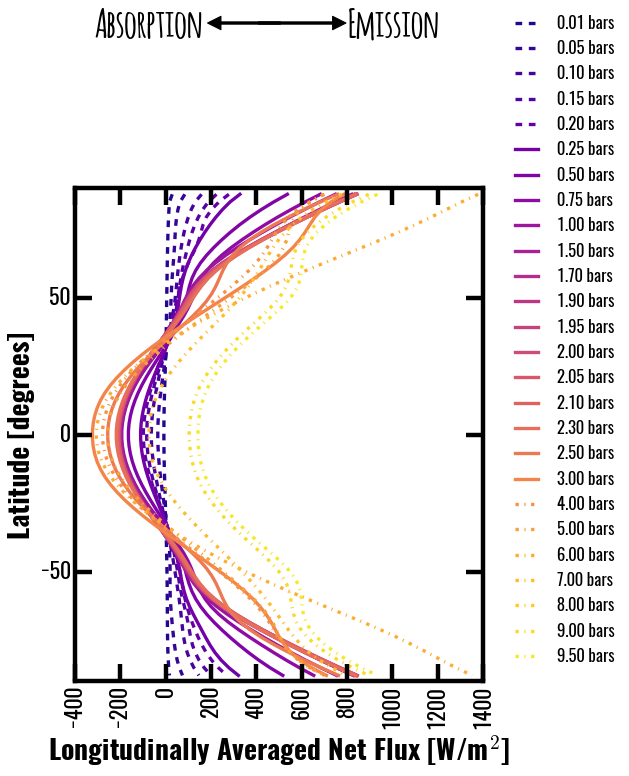

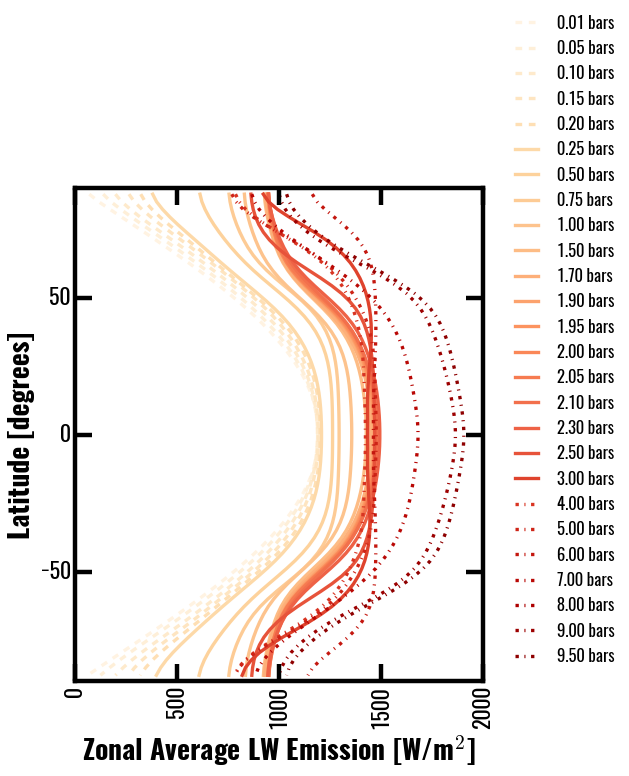

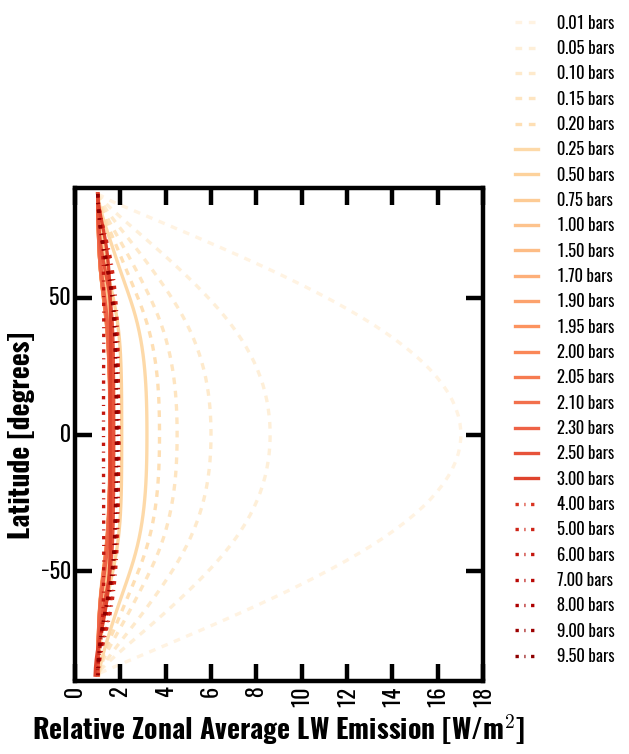

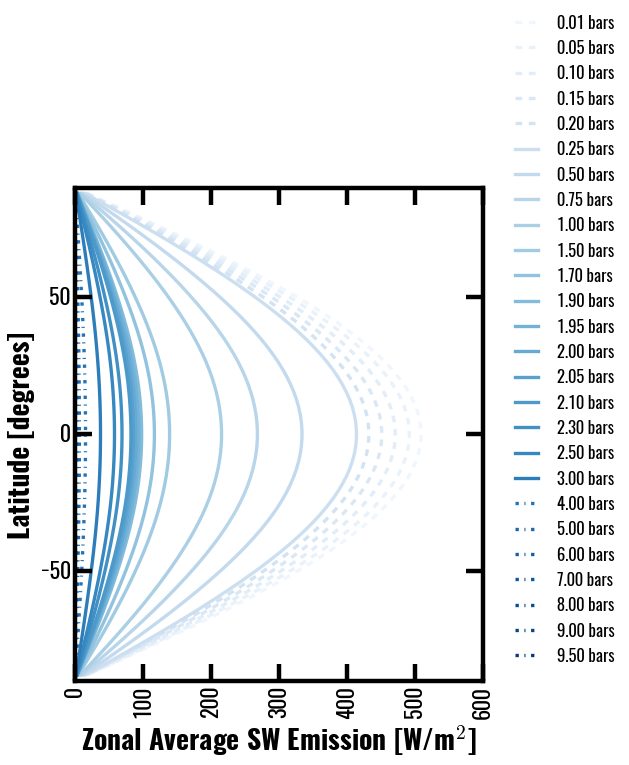

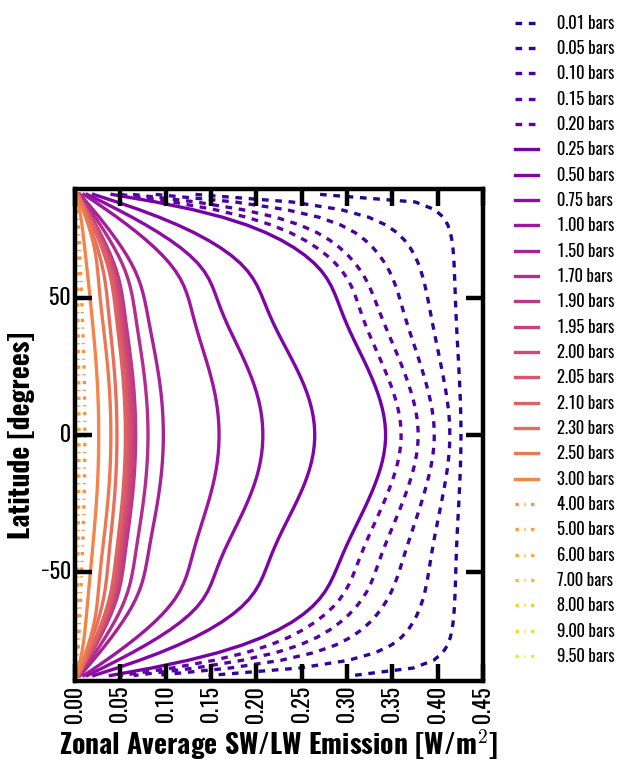

In [35]:
path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'

runpath4='FiducialPlanet_NEW/Model4/'
runs4_n=np.array(['P0_001','P0_005','P0_010','P0_015','P0_020'])
runs4_l=['0.01 bars','0.05 bars','0.10 bars', '0.15 bars','0.20 bars']

lat_arr=(pickle.load(open(path+runpath4+runs4_n[0]+'/pres_lon_lat.txt', 'rb')))[2]

net_lo_4=np.empty([len(lat_arr),len(runs4_n)])
lwh_lo_4=np.empty([len(lat_arr),len(runs4_n)])
swh_lo_4=np.empty([len(lat_arr),len(runs4_n)])
for ri,r in enumerate(runs4_n):
    tp=path+runpath4+str(r)
    net_lo_4[:,ri]=np.nanmean(pickle.load(open(tp+'/fort66.txt', 'rb')),axis=0)
    lwh_lo_4[:,ri]=pickle.load(open(tp+'/LWF_avrg.txt', 'rb'))
    swh_lo_4[:,ri]=pickle.load(open(tp+'/SWF_avrg.txt', 'rb'))
    
########################################

runpath3a='FiducialPlanet_NEW/Model3/'#L30/'
runs3_na=np.array(['P0_025','P0_050','P0_075','P0_100','P0_150','P0_170','P0_190','P0_195','P0_200','P0_205','P0_210','P0_230','P0_250','P0_300'])
runs3_la=['0.25 bars','0.50 bars','0.75 bars', '1.00 bars','1.50 bars','1.70 bars','1.90 bars','1.95 bars','2.00 bars','2.05 bars','2.10 bars', '2.30 bars','2.50 bars','3.00 bars']
surfp_3a=np.array([0.25,0.50,0.75,1.00,1.50,1.70,1.90,1.95,2.0,2.05,2.10,2.30,2.50,3.00])

net_lo_3a=np.empty([len(lat_arr),len(runs3_na)])
lwh_lo_3a=np.empty([len(lat_arr),len(runs3_na)])
swh_lo_3a=np.empty([len(lat_arr),len(runs3_na)])

for ri,r in enumerate(runs3_na):
    tp=path+runpath3a+str(r)
    net_lo_3a[:,ri]=np.nanmean(pickle.load(open(tp+'/fort66.txt', 'rb')),axis=0)
    lwh_lo_3a[:,ri]=pickle.load(open(tp+'/LWF_avrg.txt', 'rb'))
    swh_lo_3a[:,ri]=pickle.load(open(tp+'/SWF_avrg.txt', 'rb'))


runpath2='FiducialPlanet_NEW/Model2/'
runs2_n=np.array(['P0_4','P0_5','P0_6','P0_7','P0_8','P0_9','P0_95'])#,'P0_95'])
runs2_l=['4.00 bars','5.00 bars','6.00 bars', '7.00 bars','8.00 bars','9.00 bars','9.50 bars']#,'9.50 bars']

net_lo_2=np.empty([len(lat_arr),len(runs2_n)])*np.nan
lwh_lo_2=np.empty([len(lat_arr),len(runs2_n)])*np.nan
swh_lo_2=np.empty([len(lat_arr),len(runs2_n)])*np.nan
for ri,r in enumerate(runs2_n):
    if ri==4:
        continue
    tp=path+runpath2+str(r)
    print str(r)
    net_lo_2[:,ri]=np.nanmean(pickle.load(open(tp+'/fort66.txt', 'rb')),axis=0)
    lwh_lo_2[:,ri]=pickle.load(open(tp+'/LWF_avrg.txt', 'rb'))
    swh_lo_2[:,ri]=pickle.load(open(tp+'/SWF_avrg.txt', 'rb'))

######################
    
fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.15,right=0.75)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs2_n)+2))
for ri,r in enumerate(runs4_n):
    plt.plot(-1.0*net_lo_4[:,ri],lat_arr,linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    plt.plot(-1.0*net_lo_3a[:,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

for ri,r in enumerate(runs2_n):
    plt.plot(-1.0*net_lo_2[:,ri],lat_arr,linewidth=3.0,linestyle='-.',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])
   
    
plt.ylabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r)
plt.ylim(-90,90)

plt.xlabel('Longitudinally Averaged Net Flux [W/m$^2$]',fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r,
           rotation='vertical')

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})

# plt.annotate('Emission',xy=(0.23,0.97),
#              fontsize=15,fontweight='bold',
#              ha='left',va='center',xycoords='figure fraction')
# plt.annotate(' ',xy=(0.48,0.97),xytext=(0.60,0.97),
#              ha='left',va='center',xycoords='figure fraction',
#              arrowprops=dict(width=2.0,facecolor='black'))

# plt.annotate('Absorption',xy=(0.97,0.97),
#              fontsize=15,fontweight='bold',
#              ha='right',va='center',xycoords='figure fraction')

# plt.annotate(' ',xy=(0.67,0.97),xytext=(0.50,0.97),
#              ha='left',va='center',xycoords='figure fraction',
#              arrowprops=dict(width=2.0,facecolor='black'))

plt.annotate('Absorption',xy=(0.15,0.97),
             fontsize=35,fontweight='bold',
             ha='left',va='center',xycoords='figure fraction',
            fontproperties=aprop_b)
plt.annotate(' ',xy=(0.33,0.97),xytext=(0.45,0.97),
             ha='left',va='center',xycoords='figure fraction',
             arrowprops=dict(width=2.0,facecolor='black'))

plt.annotate('Emission',xy=(0.70,0.97),
             fontsize=35,fontweight='bold',
             ha='right',va='center',xycoords='figure fraction',
            fontproperties=aprop_b)

plt.annotate(' ',xy=(0.55,0.97),xytext=(0.40,0.97),
             ha='left',va='center',xycoords='figure fraction',
             arrowprops=dict(width=2.0,facecolor='black'))

plt.savefig(path+runpath4+'/Net_Flux_f.pdf')
plt.savefig(path+runpath3a+'/Net_Flux_f.pdf')
plt.savefig(path+runpath2+'/Net_Flux_f.pdf')

plt.show()
######################

    
fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.15,right=0.75)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

color_list = plt.cm.OrRd(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs2_n)+2))
for ri,r in enumerate(runs4_n):
    plt.plot(1.0*lwh_lo_4[:,ri],lat_arr,linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    plt.plot(1.0*lwh_lo_3a[:,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

for ri,r in enumerate(runs2_n):
    plt.plot(1.0*lwh_lo_2[:,ri],lat_arr,linewidth=3.0,linestyle='-.',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])
    
    
plt.ylabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r)
plt.ylim(-90,90)

plt.xlabel('Zonal Average LW Emission [W/m$^2$]',fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r,
           rotation='vertical')

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})

# plt.annotate('Emission',xy=(0.23,0.97),
#              fontsize=15,fontweight='bold',
#              ha='left',va='center',xycoords='figure fraction')
# plt.annotate(' ',xy=(0.48,0.97),xytext=(0.60,0.97),
#              ha='left',va='center',xycoords='figure fraction',
#              arrowprops=dict(width=2.0,facecolor='black'))

# plt.annotate('Absorption',xy=(0.97,0.97),
#              fontsize=15,fontweight='bold',
#              ha='right',va='center',xycoords='figure fraction')

# plt.annotate(' ',xy=(0.67,0.97),xytext=(0.50,0.97),
#              ha='left',va='center',xycoords='figure fraction',
#              arrowprops=dict(width=2.0,facecolor='black'))


plt.savefig(path+runpath4+'/LWE_Flux.pdf')
plt.savefig(path+runpath3a+'/LWE_Flux.pdf')
plt.savefig(path+runpath2+'/LWE_Flux.pdf')

plt.show()

######################

    
fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.15,right=0.75)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

color_list = plt.cm.OrRd(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs2_n)+2))
for ri,r in enumerate(runs4_n):
    plt.plot(1.0*lwh_lo_4[:,ri]/lwh_lo_4[0,ri],lat_arr,linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    plt.plot(1.0*lwh_lo_3a[:,ri]/lwh_lo_3a[0,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

for ri,r in enumerate(runs2_n):
    plt.plot(1.0*lwh_lo_2[:,ri]/lwh_lo_2[0,ri],lat_arr,linewidth=3.0,linestyle='-.',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])
    
    
plt.ylabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r)
plt.ylim(-90,90)

plt.xlabel('Relative Zonal Average LW Emission [W/m$^2$]',fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r,
           rotation='vertical')

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})

# plt.annotate('Emission',xy=(0.23,0.97),
#              fontsize=15,fontweight='bold',
#              ha='left',va='center',xycoords='figure fraction')
# plt.annotate(' ',xy=(0.48,0.97),xytext=(0.60,0.97),
#              ha='left',va='center',xycoords='figure fraction',
#              arrowprops=dict(width=2.0,facecolor='black'))

# plt.annotate('Absorption',xy=(0.97,0.97),
#              fontsize=15,fontweight='bold',
#              ha='right',va='center',xycoords='figure fraction')

# plt.annotate(' ',xy=(0.67,0.97),xytext=(0.50,0.97),
#              ha='left',va='center',xycoords='figure fraction',
#              arrowprops=dict(width=2.0,facecolor='black'))


plt.savefig(path+runpath4+'/LWE_Flux_relative.pdf')
plt.savefig(path+runpath3a+'/LWE_Flux_relative.pdf')
plt.savefig(path+runpath2+'/LWE_Flux_relative.pdf')

plt.show()

########################

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.15,right=0.75)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

color_list = plt.cm.Blues(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs2_n)+2))
for ri,r in enumerate(runs4_n):
    plt.plot(1.0*swh_lo_4[:,ri],lat_arr,linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    plt.plot(1.0*swh_lo_3a[:,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

for ri,r in enumerate(runs2_n):
    plt.plot(1.0*swh_lo_2[:,ri],lat_arr,linewidth=3.0,linestyle='-.',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])
    
    
plt.ylabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r)
plt.ylim(-90,90)

plt.xlabel('Zonal Average SW Emission [W/m$^2$]',fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r,
           rotation='vertical')

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})


plt.savefig(path+runpath4+'/SWE_Flux.pdf')
plt.savefig(path+runpath3a+'/SWE_Flux.pdf')
plt.savefig(path+runpath2+'/SWE_Flux.pdf')

plt.show()

########################

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.15,right=0.75)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs2_n)+2))
for ri,r in enumerate(runs4_n):
    plt.plot(swh_lo_4[:,ri]/lwh_lo_4[:,ri],lat_arr,linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    plt.plot(swh_lo_3a[:,ri]/lwh_lo_3a[:,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

for ri,r in enumerate(runs2_n):
    plt.plot(swh_lo_2[:,ri]/lwh_lo_2[:,ri],lat_arr,linewidth=3.0,linestyle='-.',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])
    
    
plt.ylabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r)
plt.ylim(-90,90)

plt.xlabel('Zonal Average SW/LW Emission [W/m$^2$]',fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r,
           rotation='vertical')

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})


plt.savefig(path+runpath4+'/LWE_t_SWE_Flux.pdf')
plt.savefig(path+runpath3a+'/LWE_t_SWE_Flux.pdf')
plt.savefig(path+runpath2+'/LWE_t_SWE_Flux.pdf')

plt.show()

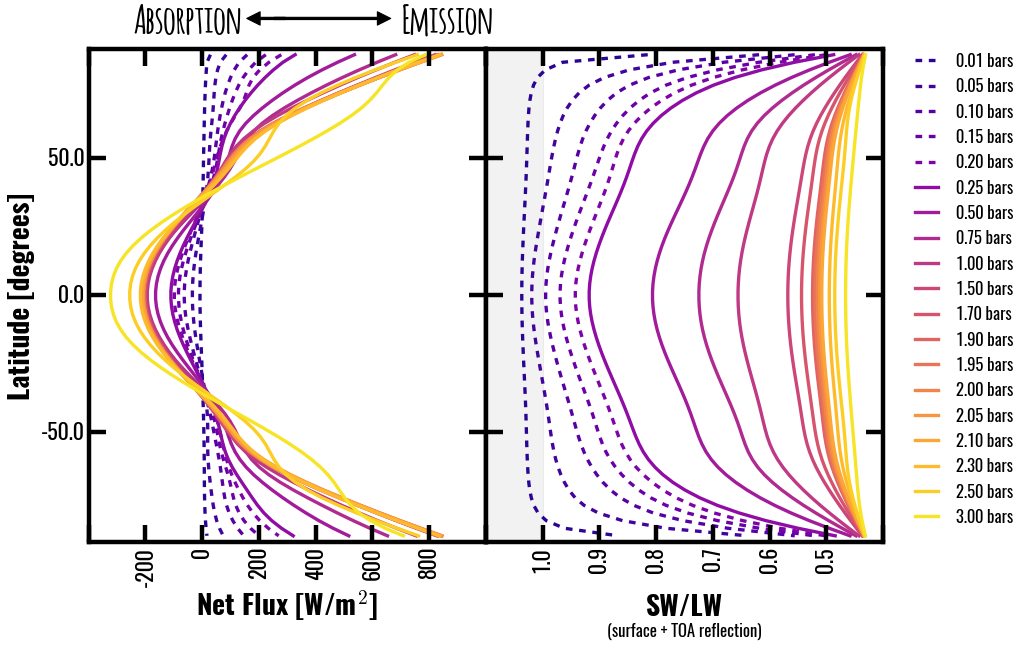

In [37]:
######################

######################

######################

########################
###########################################
left=0.15
right=0.75
width=(right-left)

fig,axes=plt.subplots(1,2,figsize=((1+width)*8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.12,right=0.85)
fig.subplots_adjust(wspace=0, hspace=0)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+2))
for ri,r in enumerate(runs4_n):
    axes[0].plot(-1.0*net_lo_4[:,ri],lat_arr,linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    axes[0].plot(-1.0*net_lo_3a[:,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

#for ri,r in enumerate(runs2_n):
#    axes[0].plot(-1.0*net_lo_2[:,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])
    
    

axes[0].set_ylabel('Latitude [degrees]',fontsize=25,fontproperties=oprop_b)
axes[0].set_ylim(-90,90)
axes[0].set_yticklabels(axes[0].get_yticks(),fontdict={'fontsize':20},fontproperties=oprop_r)
#axes[0].tick_params(axis='both',labelsize=20,fontproperties=oprop_r)

#axes[0].set_xlabel('Net Flux [W/m$^2$]',fontsize=25,fontproperties=oprop_b)
axes[0].set_xticklabels(np.append([''],np.rint(axes[0].get_xticks())[1:-1].astype(int)),fontdict={'fontsize':20},fontproperties=oprop_r,rotation='vertical')#,fontsize=20,fontproperties=oprop_r)

#plt.legend(loc='center left',frameon=False,fontsize=15)
# plt.legend(loc=(1.05,0.02),frameon=False,
#            prop={'fname':opath_r,'size':15})


########################
alb=0.3
for ri,r in enumerate(runs4_n):
    net=(swh_lo_4[:,ri]+lwh_lo_4[:,ri])/(1.-alb)
    axes[1].plot((swh_lo_4[:,ri]+alb*net)/lwh_lo_4[:,ri],lat_arr,linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    net=(swh_lo_3a[:,ri]+lwh_lo_3a[:,ri])/(1.-alb)
    axes[1].plot((swh_lo_3a[:,ri]+alb*net)/lwh_lo_3a[:,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

#for ri,r in enumerate(runs2_n):
#   net=(swh_lo_2[:,ri]+lwh_lo_2[:,ri])/(1.-alb)
#    axes[1].plot((swh_lo_2[:,ri]+alb*net)/lwh_lo_2[:,ri],lat_arr,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])
    

#axes[1].set_ylabel('Latitude [degrees]',fontsize=25,fontproperties=oprop_b)
axes[1].set_ylim(-90,90)
axes[1].set_yticklabels([],fontdict={'fontsize':20},fontproperties=oprop_r)
#axes[0].tick_params(axis='both',labelsize=20,fontproperties=oprop_r)

axes[1].set_xlim(1.10,0.40)
#axes[1].set_xlabel('SW/LW Emission [W/m$^2$]',fontsize=25,fontproperties=oprop_b)
axes[1].set_xticklabels(np.append([''],np.around(axes[1].get_xticks(),2)[1:-1]),fontdict={'fontsize':20},fontproperties=oprop_r,rotation='vertical')#,fontsize=20,fontproperties=oprop_r)

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})

#fig.align_xlabels()

plt.figtext(1.*(0.85-0.12)/4+0.12,0.045,'Net Flux [W/m$^2$]',fontsize=25,fontproperties=oprop_b,ha='center')
plt.figtext(3.*(0.85-0.12)/4+0.12,0.045,'SW/LW',fontsize=25,fontproperties=oprop_b,ha='center')
plt.figtext(3.*(0.85-0.12)/4+0.12,0.013,'(surface + TOA reflection)',fontsize=15,fontproperties=oprop_r,ha='center')

axes[1].fill_between([1.0,1.1],-90,90,color='grey',alpha=0.1)

plt.annotate('Absorption',xy=(0.13,0.97),
             fontsize=35,fontweight='bold',
             ha='left',va='center',xycoords='figure fraction',
            fontproperties=aprop_b)
plt.annotate(' ',xy=(0.24,0.97),xytext=(0.28,0.97),
             ha='left',va='center',xycoords='figure fraction',
             arrowprops=dict(width=2.0,facecolor='black'))

plt.annotate('Emission',xy=(0.48,0.97),
             fontsize=35,fontweight='bold',
             ha='right',va='center',xycoords='figure fraction',
            fontproperties=aprop_b)

plt.annotate(' ',xy=(0.38,0.97),xytext=(0.26,0.97),
             ha='left',va='center',xycoords='figure fraction',
             arrowprops=dict(width=2.0,facecolor='black'))


plt.savefig(path+runpath4+'/LWE_t_SWE_Flux_2.pdf')
plt.savefig(path+runpath3a+'/LWE_t_SWE_Flux_2.pdf')
plt.savefig(path+runpath2+'/LWE_t_SWE_Flux_2.pdf')

plt.show()

In [161]:
print np.rint(axes[0].get_xticks()[1:-1]).astype(int)

[-800 -600 -400 -200    0  200  400  600]


0 P0_4
1 P0_5
2 P0_6
3 P0_7
5 P0_9


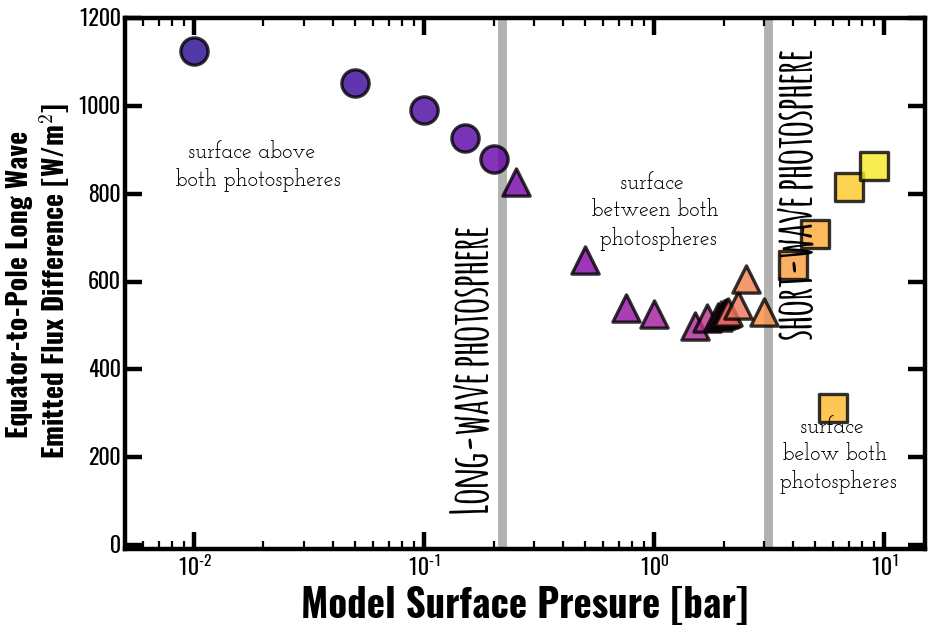

In [45]:
fig,axes=plt.subplots(figsize=(12.5,8))
#plt.gcf().subplots_adjust(bottom=0.18,top=0.95,left=0.15,right=0.70)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.95)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2


color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs2_n)+2))
ms=600
ap=0.8

lwp=0.218
swp=3.114

plt.axvline(x=lwp, color='black',linestyle='-',linewidth=8.0,alpha=0.3,zorder=0)
plt.axvline(x=swp, color='black',linestyle='-',linewidth=8.0,alpha=0.3,zorder=0)


for ri,r in enumerate(runs4_n):
    #print surfp_4[ri],np.nanmax(tmp_lo_4[:,ri]-tmp_lo_4[0,ri])
    plt.scatter(surfp_4[ri],np.nanmax(lwh_lo_4[:,ri]-lwh_lo_4[0,ri]),
                color=color_list[ri+1],#label=runs4_l[ri],
                marker='o',s=ms,alpha=ap,edgecolor='black',linewidths=3.0)
                             
for ri,r in enumerate(runs3_na):
    #print surfp_3a[ri],np.nanmax(tmp_lo_3a[:,ri]-tmp_lo_3a[0,ri])
    plt.scatter(surfp_3a[ri],np.nanmax(lwh_lo_3a[:,ri]-lwh_lo_3a[0,ri]),
                color=color_list[ri+1+len(runs4_n)],#label=runs3_la[ri],
                marker='^',s=ms,alpha=ap,edgecolor='black',linewidths=3.0)

    
for ri,r in enumerate(runs2_n):
    if ri==4:
        continue
    print ri,r
    plt.scatter(surfp_2[ri],np.nanmax(lwh_lo_2[:,ri]-lwh_lo_2[0,ri]),
                color=color_list[ri+1+len(runs4_n)+len(runs3_na)],#label=runs4_l[ri],
                marker='s',s=ms,alpha=ap,edgecolor='black',linewidths=3.0)
                             
    
    
    
plt.ylabel('Equator-to-Pole Long Wave\n Emitted Flux Difference [W/m$^2$]',
           fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r)
#plt.ylim(-90,90)
plt.ylim(-10,1200)

plt.xlabel('Model Surface Presure [bar]',
           fontsize=35,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xscale('log')
plt.xlim(0.005,15.0)

plt.figtext(0.28,0.72,'surface above \n both photospheres', 
            fontproperties=jprop_r,fontsize=20,
            #fontsize=20,fontweight='bold', 
            ha='center',va='center')

plt.figtext(0.68,0.65,'surface \n between both \n photospheres', 
            fontproperties=jprop_r,fontsize=20,
            #fontsize=20,fontweight='bold', 
            ha='center',va='center')

plt.figtext(0.86,0.27,'surface \n below both \n photospheres', 
            fontproperties=jprop_r,fontsize=20,
            #fontsize=20,fontweight='bold', 
            ha='center',va='center')

plt.annotate('Long-wave photosphere',xy=(lwp-0.06,400),rotation='vertical',
             fontproperties=aprop_b,fontsize=45,
             ha='center',va='center')

plt.annotate('short-wave photosphere',xy=(swp+1.,800),rotation='vertical',
             fontproperties=aprop_b,fontsize=45,
             ha='center',va='center')


plt.savefig(path+runpath4+'/LWFE_e2p_comp.pdf')
plt.savefig(path+runpath3a+'/LWFE_e2p_comp.pdf')
plt.savefig(path+runpath2+'/LWFE_e2p_comp.png')




/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: All-NaN slice encountered


MemoryError: Memory error

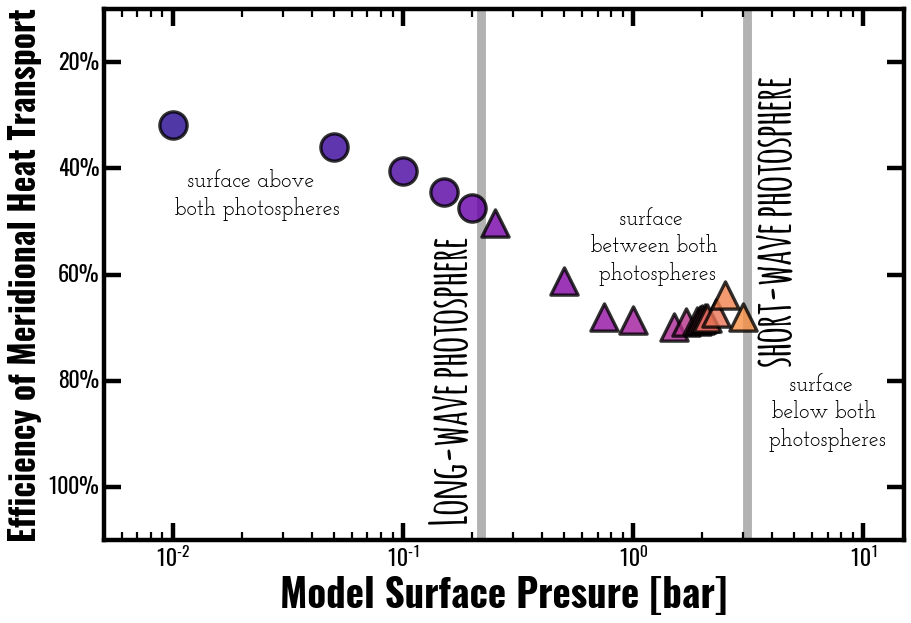

In [47]:
###SWIN=NET+LW+SW


##################
fig,axes=plt.subplots(figsize=(12.5,8))
#plt.gcf().subplots_adjust(bottom=0.18,top=0.95,left=0.15,right=0.70)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.95)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2


color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+len(runs2_n)+2))
ms=600
ap=0.8

lwp=0.218
swp=3.114

plt.axvline(x=lwp, color='black',linestyle='-',linewidth=8.0,alpha=0.3,zorder=0)
plt.axvline(x=swp, color='black',linestyle='-',linewidth=8.0,alpha=0.3,zorder=0)


for ri,r in enumerate(runs4_n):
    SWIN=net_lo_4[:,ri]+lwh_lo_4[:,ri]+swh_lo_4[:,ri]
    SWINdiff=np.nanmax(SWIN-SWIN[0])
    #print surfp_4[ri],np.nanmax(tmp_lo_4[:,ri]-tmp_lo_4[0,ri])
    plt.scatter(surfp_4[ri],100.*(SWINdiff-np.nanmax(lwh_lo_4[:,ri]-lwh_lo_4[0,ri]))/SWINdiff,
                color=color_list[ri+1],#label=runs4_l[ri],
                marker='o',s=ms,alpha=ap,edgecolor='black',linewidths=3.0)
                             
for ri,r in enumerate(runs3_na):
    SWIN=net_lo_3a[:,ri]+lwh_lo_3a[:,ri]+swh_lo_3a[:,ri]
    SWINdiff=np.nanmax(SWIN-SWIN[0])
    #print surfp_3a[ri],np.nanmax(tmp_lo_3a[:,ri]-tmp_lo_3a[0,ri])
    plt.scatter(surfp_3a[ri],100.*(SWINdiff-np.nanmax(lwh_lo_3a[:,ri]-lwh_lo_3a[0,ri]))/SWINdiff,
                color=color_list[ri+1+len(runs4_n)],#label=runs3_la[ri],
                marker='^',s=ms,alpha=ap,edgecolor='black',linewidths=3.0)


for ri,r in enumerate(runs2_n):
    if ri>3:
        continue
    SWIN=net_lo_2[:,ri]+lwh_lo_2[:,ri]+swh_lo_2[:,ri]
    SWINdiff=np.nanmax(SWIN-SWIN[0])
    #print surfp_2[ri],np.nanmax(tmp_lo_2[:,ri]-tmp_lo_2[0,ri])
    plt.scatter(surfp_2[ri],100.*(SWINdiff-np.nanmax(tmp_lo_2[:,ri]-tmp_lo_2[0,ri]))/SWINdiff,
                color=color_list[ri+1+len(runs4_n)+len(runs3_na)],#label=runs4_l[ri],
                marker='s',s=ms,alpha=ap,edgecolor='black',linewidths=3.0)
                             
    
    
    
plt.ylabel('Efficiency of Meridional Heat Transport',
           fontsize=30,fontproperties=oprop_b)
plt.yticks([100,80,60,40,20],['100%','80%','60%','40%','20%'],
           fontsize=20,fontproperties=oprop_r)
plt.ylim(110,10)
#plt.ylim(-90,90)
#plt.ylim(-10,1200)

plt.xlabel('Model Surface Presure [bar]',
           fontsize=35,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xscale('log')
plt.xlim(0.005,15.0)

plt.figtext(0.30,0.66,'surface above \n both photospheres', 
            fontproperties=jprop_r,fontsize=20,
            #fontsize=20,fontweight='bold', 
            ha='center',va='center')

plt.figtext(0.70,0.58,'surface \n between both \n photospheres', 
            fontproperties=jprop_r,fontsize=20,
            #fontsize=20,fontweight='bold', 
            ha='center',va='center')

plt.figtext(0.87,0.32,'surface \n below both \n photospheres', 
            fontproperties=jprop_r,fontsize=20,
            #fontsize=20,fontweight='bold', 
            ha='center',va='center')

plt.annotate('Long-wave photosphere',xy=(lwp-0.06,80),rotation='vertical',
             fontproperties=aprop_b,fontsize=45,
             ha='center',va='center')

plt.annotate('short-wave photosphere',xy=(swp+1.,50),rotation='vertical',
             fontproperties=aprop_b,fontsize=45,
             ha='center',va='center')


plt.savefig(path+runpath4+'/LWFE_e2p_rel_comp.pdf')
plt.savefig(path+runpath3a+'/LWFE_e2p_rel_comp.pdf')
plt.savefig(path+runpath2+'/LWFE_e2p_rel_comp.png')




(30,) (64,)


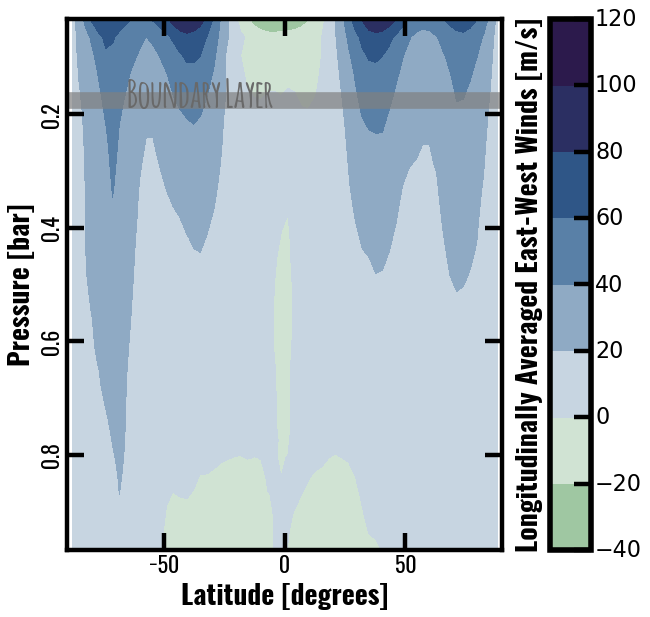

In [5]:
path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
#runname='FiducialPlanet_NEW/Model3/P0_025'
#runname='FiducialPlanet_NEW/Model4/P0_020'
runname='EARTH_T42'

p0=0.25
kf=0.7
plot=1  #0=temp,1=u, 2=v


################


fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.76)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

if plot==0:
    #cm_data = np.loadtxt("ScientificColourMaps5/acton/acton.txt")
    cm_data = np.loadtxt("ScientificColourMaps5/lajolla/lajolla.txt")
    #colors1 = plt.cm.viridis(np.linspace(0.3, 1., 128))
    #colors2 = plt.cm.inferno(np.linspace(0.1, 1.0, 128))
    #cm_data = np.vstack((colors1, colors2))
    #cm_data = plt.cm.Spectral_r(np.linspace(0, 1, 128))#np.loadtxt("ScientificColourMaps5/cork/cork.txt")
    cm_data=np.flip(cm_data,axis=0)
    #cm_data=colors2
if plot==1:
    cm_data = np.loadtxt("ScientificColourMaps5/cork/cork.txt")
    cm_data=np.flip(cm_data,axis=0)
if plot==2:
    cm_data = plt.cm.PuOr(np.linspace(0, 1, 128))#np.loadtxt("ScientificColourMaps5/cork/cork.txt")
    #cm_data=np.flip(cm_data,axis=0)
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', cm_data)

p_BAR=pickle.load(open(path+runname+'/pres_lon_lat.txt', 'rb'))[0]
lat_arr=pickle.load(open(path+runname+'/pres_lon_lat.txt', 'rb'))[2]
data_26=pickle.load(open(path+runname+'/fort26.txt', 'rb'))
print p_BAR.shape, lat_arr.shape

lat,press=np.meshgrid(lat_arr,p_BAR)

if plot==0:
    ind=5
if plot==1:
    ind=3
if plot==2:
    ind=4
    
data_plot=np.nanmedian(data_26[:,:,:,ind],axis=1)
   
if plot==1 or plot==2:
    minV=np.int((np.nanmin(data_plot)))*1.0
    maxV=np.ceil(np.nanmax(data_plot))
    lim=np.nanmax([np.abs(minV),np.abs(maxV)])
    minV=-1.0*lim
    maxV=lim
else:
    minV=np.int((np.nanmin(data_plot)))*1.0
    maxV=np.ceil(np.nanmax(data_plot)) 

if plot==0:
    levels=np.around(np.linspace(minV,maxV,32))
    p=plt.contourf(lat,press,data_plot,levels=levels,cmap=mymap,vmin=minV,vmax=maxV)
else:
    p=plt.contourf(lat,press,data_plot,cmap=mymap,vmin=minV,vmax=maxV)
    
plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(-90,90)

plt.ylabel('Pressure [bar]',fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='vertical')
plt.ylim(np.nanmax(p_BAR),np.nanmin(p_BAR))


if plot==0:
    plt.figtext(0.78,0.12+(0.95-0.12)/2.0,'Longitudinally Averaged Temperature [K]', 
            fontsize=25,fontproperties=oprop_b,rotation='vertical',
           ha='left',va='center')
if plot==1:
    plt.figtext(0.78,0.12+(0.95-0.12)/2.0,'Longitudinally Averaged East-West Winds [m/s]', 
            fontsize=25,fontproperties=oprop_b,rotation='vertical',
           ha='left',va='center')
if plot==2:
    plt.figtext(0.78,0.12+(0.95-0.12)/2.0,'North-South Winds [m/s]', 
            fontsize=25,fontproperties=oprop_b,rotation='vertical',
           ha='left',va='center')

if plot==1 or plot==0:
    plt.axhline(kf*p0,color='grey',linewidth=15.0,alpha=0.7)
    plt.annotate('Boundary Layer',xy=(-35,kf*p0*0.93),ha='center',va='center',
                 fontproperties=aprop_b,color='dimgrey',fontsize=35)

#for pi in p_BAR:
#    plt.axhline(y=pi,xmin=0,xmax=0.04,linestyle='-',color='grey',linewidth=2.0)


cbaxes = fig.add_axes([0.83, 0.12, 0.06, 0.95-0.12]) 
cb = plt.colorbar(p,orientation='vertical',cax=cbaxes)
cb.ax.tick_params(labelsize=20)
cb.ax.set_xticklabels(cb.ax.get_xticks(),fontproperties=oprop_b)
#cb.ax.invert_xaxis() 
cb.outline.set_linewidth(5)
#cb.set_label('East-West Winds [m/s]', fontsize=25,fontproperties=oprop_b)
#cb.ax.yaxis.set_label_position('left')


if plot==0:
    plt.savefig(path+runname+'/pressprofile_TP.pdf')
if plot==1:
    plt.savefig(path+runname+'/pressprofile_EW.pdf')
if plot==2:
    plt.savefig(path+runname+'/pressprofile_NS.pdf')


plt.show()

No handlers could be found for logger "matplotlib.legend"


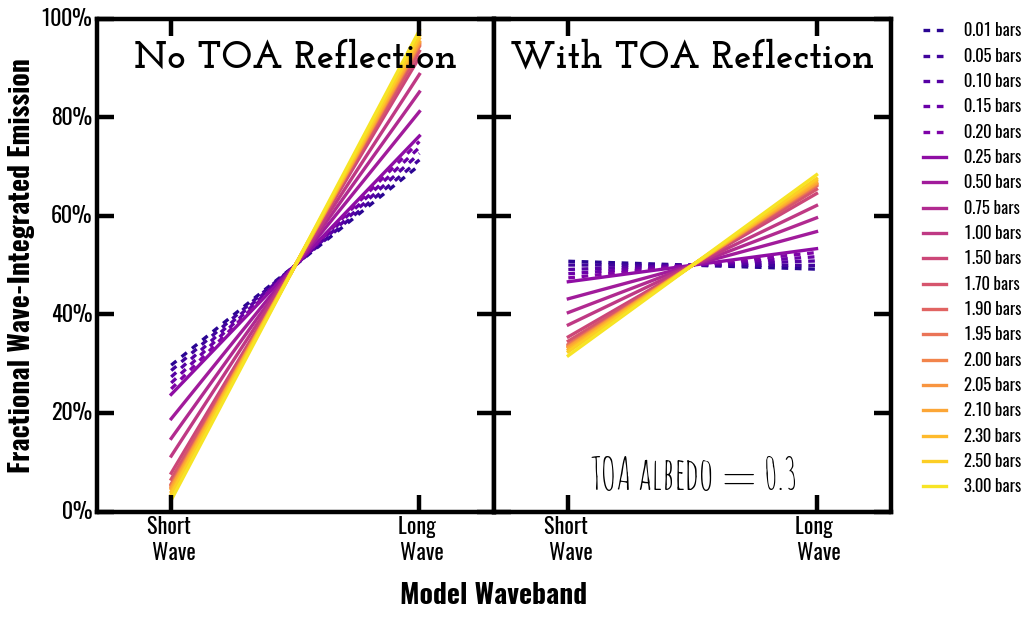

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#%matplotlib inline
from matplotlib.font_manager import FontProperties

params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)

alb=0.3


path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'

runpath4='FiducialPlanet_NEW/Model4/'#L10/T42/'
runs4_n=np.array(['P0_001','P0_005','P0_010','P0_015','P0_020'])
runs4_l=['0.01 bars','0.05 bars','0.10 bars', '0.15 bars','0.20 bars']

sw_4=np.empty([len(runs4_l)])*np.nan
lw_4=np.empty([len(runs4_l)])*np.nan
for ri,r in enumerate(runs4_n):
    tp=path+runpath4+str(r)
    sw_4[ri]=pickle.load(open(tp+'/SW_total.txt', 'rb'))
    lw_4[ri]=pickle.load(open(tp+'/LW_total.txt', 'rb'))
    
####################

runpath3a='FiducialPlanet_NEW/Model3/'#L30/'
runs3_na=np.array(['P0_025','P0_050','P0_075','P0_100','P0_150','P0_170','P0_190','P0_195','P0_200','P0_205','P0_210','P0_230','P0_250','P0_300'])
runs3_la=['0.25 bars','0.50 bars','0.75 bars', '1.00 bars','1.50 bars','1.70 bars','1.90 bars','1.95 bars','2.00 bars','2.05 bars','2.10 bars', '2.30 bars','2.50 bars','3.00 bars']
surfp_3a=np.array([0.25,0.50,0.75,1.00,1.50,1.70,1.90,1.95,2.0,2.05,2.10,2.30,2.50,3.00])

sw_3a=np.empty([len(runs3_la)])*np.nan
lw_3a=np.empty([len(runs3_la)])*np.nan
for ri,r in enumerate(runs3_na):
    tp=path+runpath3a+str(r)
    sw_3a[ri]=pickle.load(open(tp+'/SW_total.txt', 'rb'))
    lw_3a[ri]=pickle.load(open(tp+'/LW_total.txt', 'rb'))
    

runpath2='FiducialPlanet/Model2/'
runs2_n=np.array(['P0_40','P0_50','P0_60','P0_70','P0_80','P0_90'])#,'P0_95'])
runs2_l=['4.00 bars','5.00 bars','6.00 bars', '7.00 bars','8.00 bars','9.00 bars']#,'9.50 bars']

sw_2=np.empty([len(runs2_l)])*np.nan
lw_2=np.empty([len(runs2_l)])*np.nan
for ri,r in enumerate(runs2_n):
    tp=path+runpath2+str(r)
    sw_2[ri]=pickle.load(open(tp+'/SW_total.txt', 'rb'))
    lw_2[ri]=pickle.load(open(tp+'/LW_total.txt', 'rb'))
    
####################

    
    
###########################################
left=0.15
right=0.75
width=(right-left)

fig,axes=plt.subplots(1,2,figsize=((1+width)*8.5,8))
plt.gcf().subplots_adjust(bottom=0.16,top=0.93,left=0.12,right=0.85)
fig.subplots_adjust(wspace=0, hspace=0)

plt.style.use('classic')
fig.patch.set_facecolor('none')
rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

color_list = plt.cm.plasma(np.linspace(0., 1, len(runs4_n)+len(runs3_na)+2))
for ri,r in enumerate(runs4_n):
    net=sw_4[ri]+lw_4[ri]
    axes[0].plot([1,2],100.*np.array([sw_4[ri],lw_4[ri]])/net,linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    net=sw_3a[ri]+lw_3a[ri]
    axes[0].plot([1,2],100.*np.array([sw_3a[ri],lw_3a[ri]])/net,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

#for ri,r in enumerate(runs2_n):
#    net=sw_2[ri]+lw_2[ri]
#    axes[0].plot([1,2],100.*np.array([sw_2[ri],lw_2[ri]])/net,linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])


axes[0].set_ylabel('Fractional Wave-Integrated Emission',fontsize=25,fontproperties=oprop_b)
axes[0].set_yticks([0,20,40,60,80,100])
axes[0].set_yticklabels(['0%','20%','40%','60%','80%','100%'],
                        fontdict={'fontsize':20},fontproperties=oprop_r)
#axes[0].tick_params(axis='both',labelsize=20,fontproperties=oprop_r)

axes[0].set_xticks([1.0,2.0])
axes[0].set_xticklabels(['Short \n Wave','Long \n Wave'],
                        fontdict={'fontsize':20},fontproperties=oprop_r)#,fontsize=20,fontproperties=oprop_r)
axes[0].set_xlim(0.7,2.3)

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})

###########################################
    
alb=0.3
for ri,r in enumerate(runs4_n):
    net=(sw_4[ri]+lw_4[ri])/(1.-alb)
    axes[1].plot([1,2],100.*np.array([sw_4[ri]+alb*net,lw_4[ri]])/(net),linewidth=3.0,linestyle='--',color=color_list[ri+1],label=runs4_l[ri])
                             
for ri,r in enumerate(runs3_na):
    net=(sw_3a[ri]+lw_3a[ri])/(1.-alb)
    axes[1].plot([1,2],100.*np.array([sw_3a[ri]+alb*net,lw_3a[ri]])/(net),linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)],label=runs3_la[ri])

#for ri,r in enumerate(runs2_n):
#    net=(sw_2[ri]+lw_2[ri])/(1.-alb)
#    axes[1].plot([1,2],100.*np.array([sw_2[ri]+alb*net,lw_2[ri]])/(net),linewidth=3.0,linestyle='-',color=color_list[ri+1+len(runs4_n)+len(runs3_na)],label=runs2_l[ri])


# plt.ylabel('Fractional Wave-Integrated Emission',fontsize=25,fontproperties=oprop_b)
axes[1].set_yticks([0,20,40,60,80,100])
axes[1].set_yticklabels(['','','','','',''])

#axes[1].set_xlabel('Waveband',fontsize=25,fontproperties=oprop_b)
axes[1].set_xticks([1.0,2.0])
axes[1].set_xticklabels(['Short \n Wave','Long \n Wave'],
                        fontdict={'fontsize':20},fontproperties=oprop_r)#,fontsize=20,fontproperties=oprop_r)
axes[1].set_xlim(0.7,2.3)

#plt.legend(loc='center left',frameon=False,fontsize=15)
plt.legend(loc=(1.05,0.02),frameon=False,
           prop={'fname':opath_r,'size':15})

# plt.savefig(path+runpath4+'/Simp_Spec_refl.pdf')
# plt.savefig(path+runpath3a+'/Simp_Spec_refl.pdf')
# plt.savefig(path+runpath3b+'/Simp_Spec_refl.pdf')

# for ax in axes.flatten():
#     labels = ax.get_xticklabels() + ax.get_yticklabels()
#     [label.set_fontname(oprop_r) for label in labels]

plt.figtext((0.85-0.12)/2+0.12,0.05,'Model Waveband',fontsize=25,fontproperties=oprop_b,ha='center',va='top')

plt.figtext((0.85-0.12)/4+0.12,0.9,'No TOA Reflection',fontsize=35,fontproperties=jprop_b,ha='center',va='top')
plt.figtext(3*(0.85-0.12)/4+0.12,0.9,'With TOA Reflection',fontsize=35,fontproperties=jprop_b,ha='center',va='top')

plt.figtext(3*(0.85-0.12)/4+0.12,0.25,'TOA albedo$=$0.3',fontsize=40,fontproperties=aprop_r,ha='center',va='top')

plt.savefig(path+runpath4+'/Simp_Spec.pdf')
plt.savefig(path+runpath3a+'/Simp_Spec.pdf')
plt.savefig(path+runpath2+'/Simp_Spec.pdf')

    

SyntaxError: invalid syntax (<ipython-input-18-93b5d3ad75cb>, line 2)